Saving image 4.png to image 4.png
Original Image


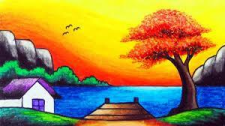

DLT Transformed Image


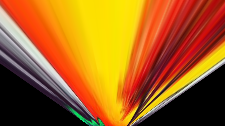

In [1]:
!pip install opencv-python

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload image
uploaded = files.upload()
image = cv2.imread(list(uploaded.keys())[0])

if image is None:
    print("Error loading image")
else:
    rows, cols = image.shape[:2]

    # Source points (minimum 4)
    src_pts = np.float32([
        [50, 50],
        [cols-50, 50],
        [cols-50, rows-50],
        [50, rows-50]
    ])

    # Destination points
    dst_pts = np.float32([
        [0, 0],
        [cols, 0],
        [cols-100, rows],
        [100, rows]
    ])

    # ----------- DLT Algorithm -----------
    A = []

    for i in range(4):
        x, y = src_pts[i][0], src_pts[i][1]
        x_p, y_p = dst_pts[i][0], dst_pts[i][1]

        A.append([-x, -y, -1, 0, 0, 0, x*x_p, y*x_p, x_p])
        A.append([0, 0, 0, -x, -y, -1, x*y_p, y*y_p, y_p])

    A = np.array(A)

    # Solve Ah = 0 using SVD
    U, S, Vt = np.linalg.svd(A)
    H = Vt[-1].reshape(3, 3)

    # Normalize
    H = H / H[2, 2]

    # Apply transformation
    transformed_image = cv2.warpPerspective(image, H, (cols, rows))

    # Display results
    print("Original Image")
    cv2_imshow(image)

    print("DLT Transformed Image")
    cv2_imshow(transformed_image)
